In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from util.visualization import *
from NNetwork import NNetwork as nn
from src.supervised_NDL.SNDL import sndl_equalEdge, sndl_predict
from util.plotting import *
from src.sampling.Sampling import sampling_sndl

# Synthetic Baseline

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/CM_Caltech36_WS_Caltech36_BA_Caltech36_bs50_k5_xi7_nc10_iter50_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary
Calling `sndl_equalEdge` and computing dictionary
Calling `sndl_equalEdge` and computing dictionary


100%|██████████| 50/50 [00:00<00:00, 67.74it/s]


Saving dictionary...
Plotting...
Adding a table...


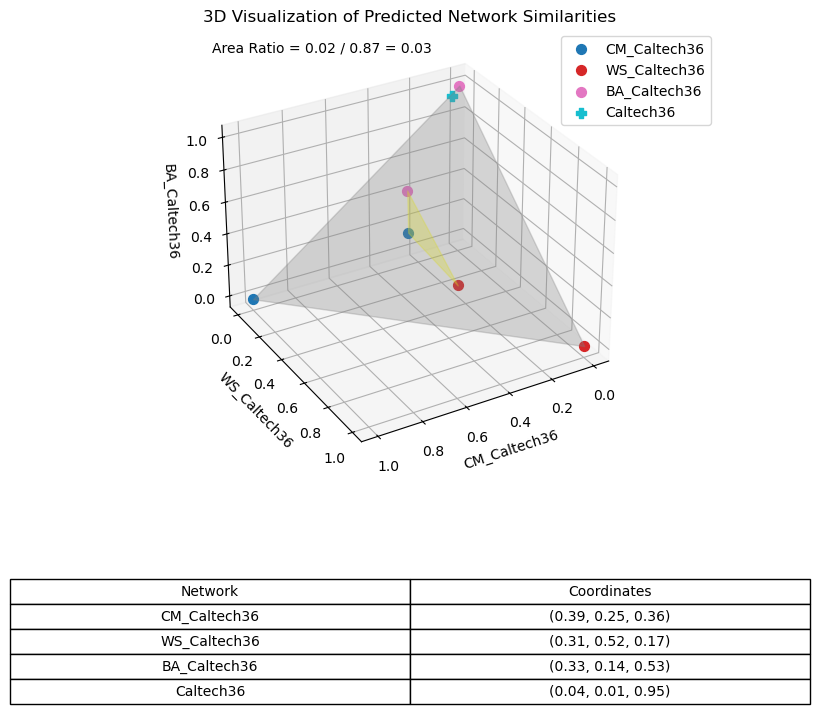

In [2]:
ntwk_list = ['CM_Caltech36', 'WS_Caltech36', 'BA_Caltech36', 'Caltech36']
plot_3d_prediction(ntwk_list, base_sample_size=50, k=5, n_components=10, iterations=50, baseline_i=0)

# Biological Networks

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/bio-human_bio-fruitfly_bio-plant_bs50_k5_xi7_nc10_iter50_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary
Calling `sndl_equalEdge` and computing dictionary
Calling `sndl_equalEdge` and computing dictionary


100%|██████████| 50/50 [00:00<00:00, 241.32it/s]


Saving dictionary...
Plotting...
Adding a table...


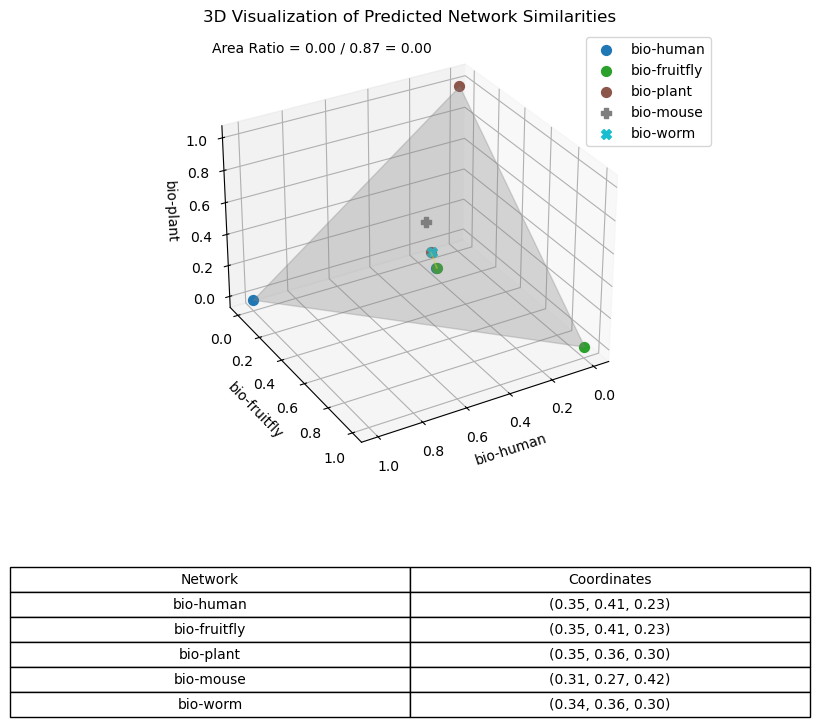

In [3]:
ntwk_list = ['bio-human', 'bio-fruitfly', 'bio-plant', 'bio-mouse', 'bio-worm']
plot_3d_prediction(ntwk_list, base_sample_size=50, k=5, n_components=10, iterations=50, baseline_i=0)